# AUTOMOBILE/MACHINE FAILURE PREDICTION

# Importing libraries and CSV file

In [2]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [3]:
df = pd.read_csv("train.csv")
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [57]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature K',
       'Process temperature K', 'Rotational speed rpm', 'Torque Nm',
       'Tool wear min', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF',
       'Faliures', 'Power', 'temp_ratio', 'Process temperature C',
       'Air temperature C', 'temp_C_ratio', 'tool_wear_speed',
       'torque wear ratio', 'torque times wear', 'product_id_num'],
      dtype='object')

Type: A categorical variable that represents the machine type. This variable can be used to specify different machine types or models.

Air temperature [K]: A continuous variable that measures the air temperature in Kelvin in the environment where the process takes place (for example, a factory or workplace).



# Exploratory Data Analysis

Describe,
Null value check,
Correlation heatmap,
Scatter plot,
Histplot,

In [4]:
df.describe()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df['Type'].value_counts()

L    95354
M    32152
H     8923
Name: Type, dtype: int64

In [12]:
df.isnull().sum()

id                         0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

<AxesSubplot:>

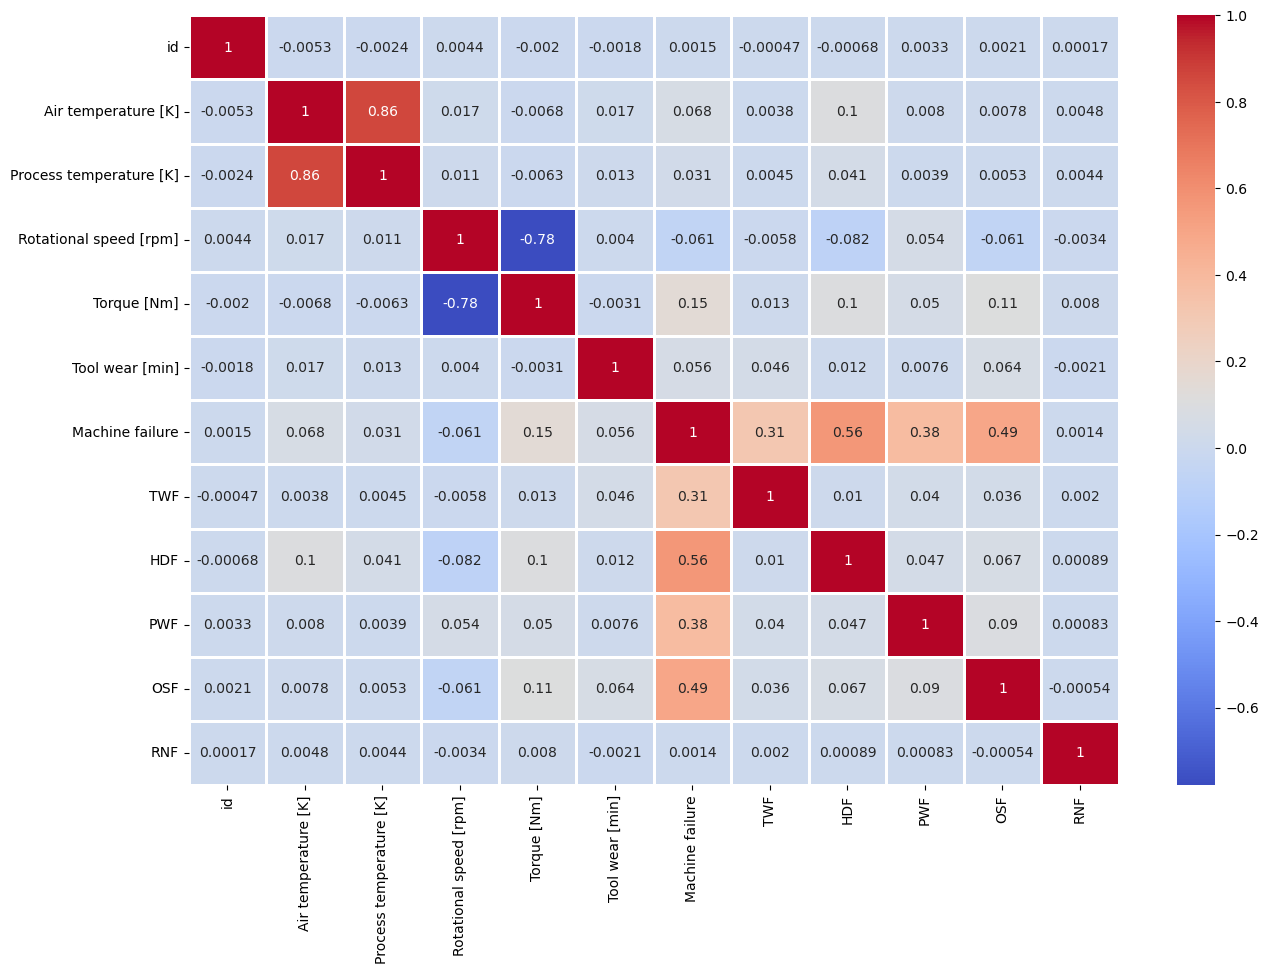

In [5]:
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(df.corr(),annot=True,lw=2,linecolor='white',cmap='coolwarm')

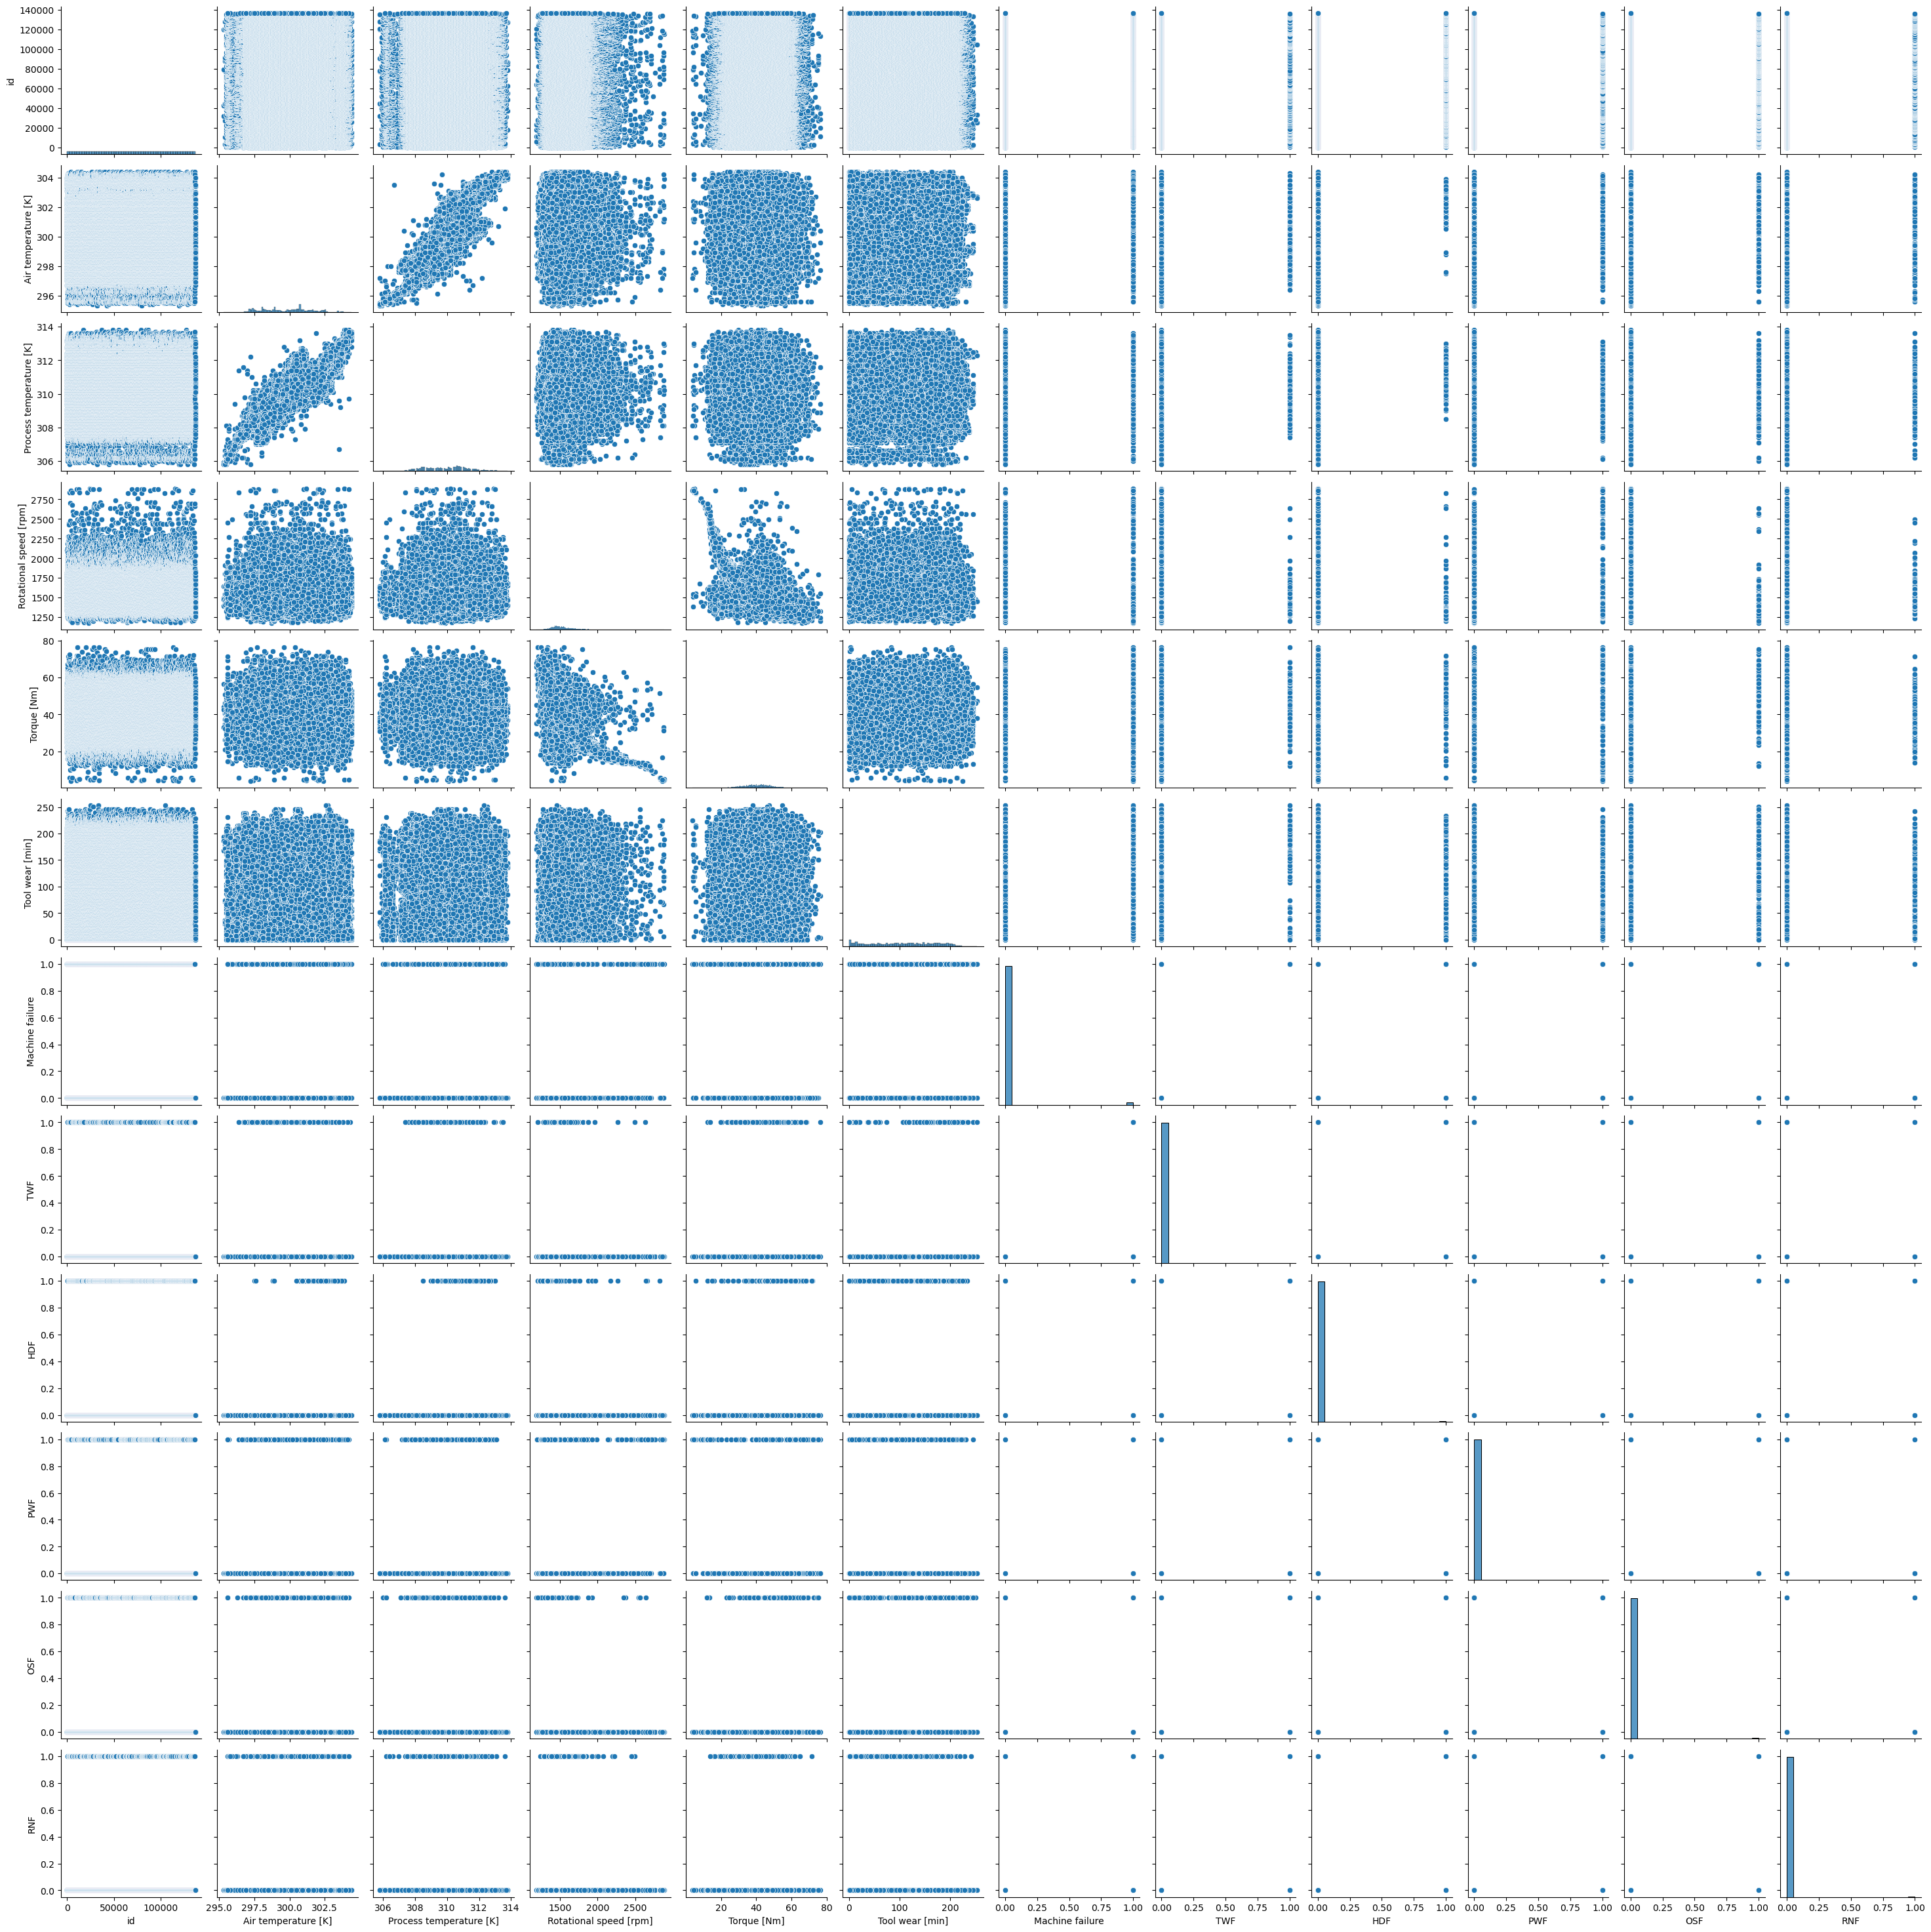

In [10]:
sns.pairplot(data = df)

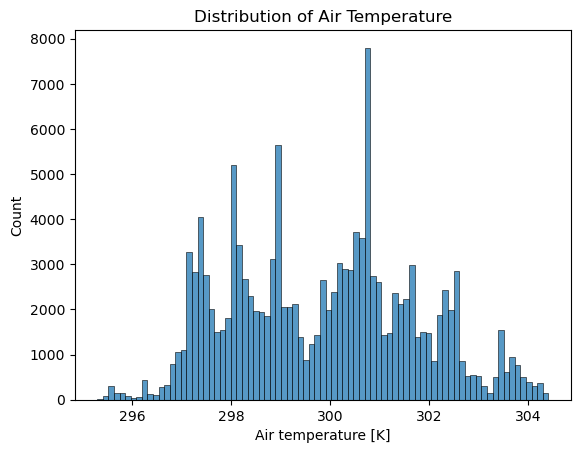

In [15]:
sns.histplot(df['Air temperature [K]'])
plt.xlabel('Air temperature [K]')
plt.ylabel('Count')
plt.title('Distribution of Air Temperature')
plt.show()

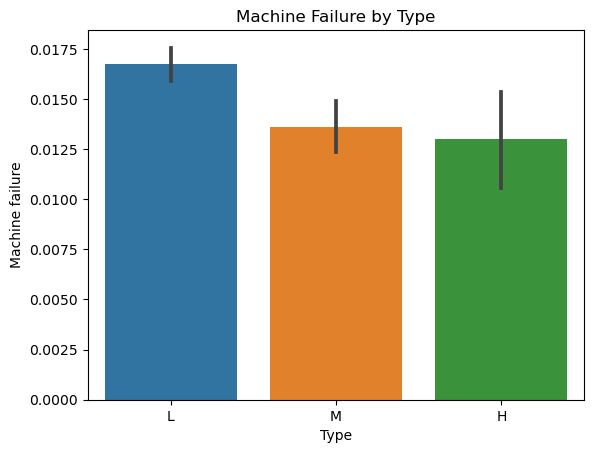

In [17]:
sns.barplot(x='Type', y='Machine failure', data=df)
plt.xlabel('Type')
plt.ylabel('Machine failure')
plt.title('Machine Failure by Type')
plt.show()


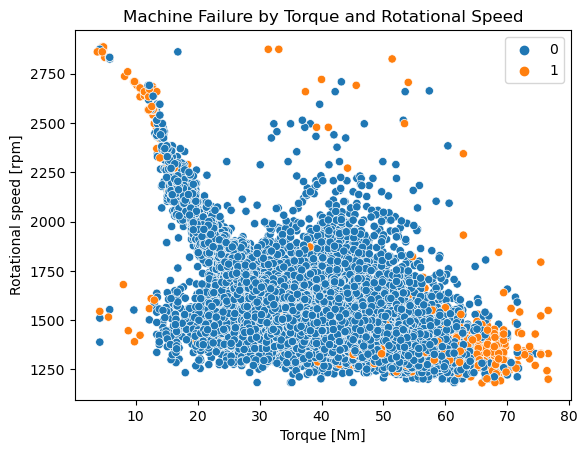

In [18]:
sns.scatterplot(x='Torque [Nm]', y='Rotational speed [rpm]', hue='Machine failure', data=df)
plt.xlabel('Torque [Nm]')
plt.ylabel('Rotational speed [rpm]')
plt.title('Machine Failure by Torque and Rotational Speed')
plt.legend()
plt.show()

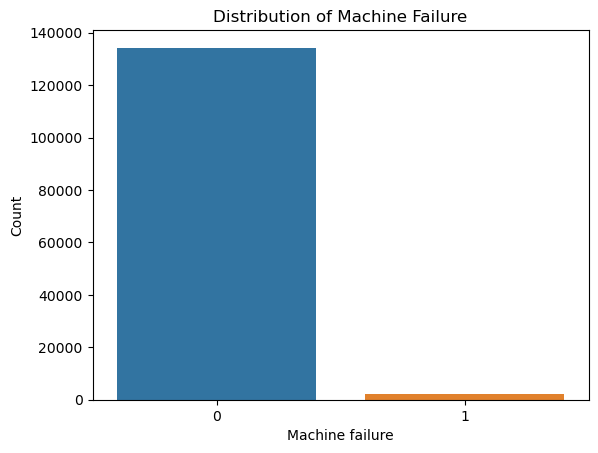

In [19]:
# Target Variable Distribution
sns.countplot(x='Machine failure', data=df)
plt.xlabel('Machine failure')
plt.ylabel('Count')
plt.title('Distribution of Machine Failure')
plt.show()

# Encoding of categorical cols

In [23]:
from sklearn.preprocessing import OrdinalEncoder

categorical_cols = ["Type"]

# Low, medium, high, in order (0, 1, 2)
encoder = OrdinalEncoder(categories=[['L','M','H']])
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])
df.describe()

,id,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000,136429.000000
mean,68214.000000,0.366476,299.862776,309.941070,1520.331110,40.348643,104.408901,0.015744,0.001554,0.005160,0.002397,0.003958,0.002258
std,39383.804275,0.602480,1.862247,1.385173,138.736632,8.502229,63.965040,0.124486,0.039389,0.071649,0.048899,0.062789,0.047461
min,0.000000,0.000000,295.300000,305.800000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34107.000000,0.000000,298.300000,308.700000,1432.000000,34.600000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68214.000000,0.000000,300.000000,310.000000,1493.000000,40.400000,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,102321.000000,1.000000,301.200000,310.900000,1580.000000,46.100000,159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,136428.000000,2.000000,304.400000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Engineering 

Combining errors in one coulumn

In [24]:
df.columns = df.columns.str.replace('[\[\]]', '', regex=True)
df

,id,Product ID,Type,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min,Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,0.0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,1.0,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,0.0,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,0.0,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,1.0,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,1.0,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,2.0,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,0.0,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,0.0,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [25]:
df['Faliures'] = df['TWF'] + df['PWF'] + df['OSF'] + df['RNF'] + df['HDF']

In [26]:
df["Power"] = df["Torque Nm"] * df["Rotational speed rpm"]
df["Power"].head()

0    57615.6
1    51186.9
2    47832.5
3    67513.2
4    58091.4
Name: Power, dtype: float64

In [27]:
df["temp_ratio"] = df["Process temperature K"] / df["Air temperature K"]
df["temp_ratio"].head()

0    1.029940
1    1.031395
2    1.030738
3    1.032890
4    1.036913
Name: temp_ratio, dtype: float64

In [28]:
df["Process temperature C"] = df["Process temperature K"] - 273.15
df["Process temperature C"].head()

0    36.45
1    38.95
2    35.35
3    37.75
4    35.85
Name: Process temperature C, dtype: float64

In [29]:
df["Air temperature C"] = df["Air temperature K"] - 273.15
df["Air temperature C"].head()

0    27.45
1    29.45
2    26.15
3    27.85
4    24.85
Name: Air temperature C, dtype: float64

In [30]:
df["temp_C_ratio"] = df["Process temperature C"] / df["Air temperature C"]
df["temp_C_ratio"].head()

0    1.327869
1    1.322581
2    1.351816
3    1.355476
4    1.442656
Name: temp_C_ratio, dtype: float64

In [31]:
df["tool_wear_speed"] = df["Tool wear min"] * df["Rotational speed rpm"]
df["tool_wear_speed"].head()

0    223440
1    351800
2     45125
3    300228
4     55794
Name: tool_wear_speed, dtype: int64

In [32]:
df["torque wear ratio"] = df["Torque Nm"] / (df["Tool wear min"] + 0.0001)
df["torque times wear"] = df["Torque Nm"] * df["Tool wear min"]
df.head()

,id,Product ID,Type,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min,Machine failure,TWF,...,RNF,Faliures,Power,temp_ratio,Process temperature C,Air temperature C,temp_C_ratio,tool_wear_speed,torque wear ratio,torque times wear
0,0,L50096,0.0,300.6,309.6,1596,36.1,140,0,0,...,0,0,57615.6,1.029940,36.45,27.45,1.327869,223440,0.257857,5054.0
1,1,M20343,1.0,302.6,312.1,1759,29.1,200,0,0,...,0,0,51186.9,1.031395,38.95,29.45,1.322581,351800,0.145500,5820.0
2,2,L49454,0.0,299.3,308.5,1805,26.5,25,0,0,...,0,0,47832.5,1.030738,35.35,26.15,1.351816,45125,1.059996,662.5
3,3,L53355,0.0,301.0,310.9,1524,44.3,197,0,0,...,0,0,67513.2,1.032890,37.75,27.85,1.355476,300228,0.224873,8727.1
4,4,M24050,1.0,298.0,309.0,1641,35.4,34,0,0,...,0,0,58091.4,1.036913,35.85,24.85,1.442656,55794,1.041173,1203.6


In [33]:
df["torque wear ratio"] = df["Torque Nm"] / (df["Tool wear min"] + 0.0001)
df["torque times wear"] = df["Torque Nm"] * df["Tool wear min"]
df.head()

,id,Product ID,Type,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min,Machine failure,TWF,...,RNF,Faliures,Power,temp_ratio,Process temperature C,Air temperature C,temp_C_ratio,tool_wear_speed,torque wear ratio,torque times wear
0,0,L50096,0.0,300.6,309.6,1596,36.1,140,0,0,...,0,0,57615.6,1.029940,36.45,27.45,1.327869,223440,0.257857,5054.0
1,1,M20343,1.0,302.6,312.1,1759,29.1,200,0,0,...,0,0,51186.9,1.031395,38.95,29.45,1.322581,351800,0.145500,5820.0
2,2,L49454,0.0,299.3,308.5,1805,26.5,25,0,0,...,0,0,47832.5,1.030738,35.35,26.15,1.351816,45125,1.059996,662.5
3,3,L53355,0.0,301.0,310.9,1524,44.3,197,0,0,...,0,0,67513.2,1.032890,37.75,27.85,1.355476,300228,0.224873,8727.1
4,4,M24050,1.0,298.0,309.0,1641,35.4,34,0,0,...,0,0,58091.4,1.036913,35.85,24.85,1.442656,55794,1.041173,1203.6


In [35]:
df

,id,Product ID,Type,Air temperature K,Process temperature K,Rotational speed rpm,Torque Nm,Tool wear min,Machine failure,TWF,...,RNF,Faliures,Power,temp_ratio,Process temperature C,Air temperature C,temp_C_ratio,tool_wear_speed,torque wear ratio,torque times wear
0,0,L50096,0.0,300.6,309.6,1596,36.1,140,0,0,...,0,0,57615.6,1.029940,36.45,27.45,1.327869,223440,0.257857,5054.0
1,1,M20343,1.0,302.6,312.1,1759,29.1,200,0,0,...,0,0,51186.9,1.031395,38.95,29.45,1.322581,351800,0.145500,5820.0
2,2,L49454,0.0,299.3,308.5,1805,26.5,25,0,0,...,0,0,47832.5,1.030738,35.35,26.15,1.351816,45125,1.059996,662.5
3,3,L53355,0.0,301.0,310.9,1524,44.3,197,0,0,...,0,0,67513.2,1.032890,37.75,27.85,1.355476,300228,0.224873,8727.1
4,4,M24050,1.0,298.0,309.0,1641,35.4,34,0,0,...,0,0,58091.4,1.036913,35.85,24.85,1.442656,55794,1.041173,1203.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,1.0,300.1,311.4,1530,37.5,210,0,0,...,0,0,57375.0,1.037654,38.25,26.95,1.419295,321300,0.178571,7875.0
136425,136425,H38017,2.0,297.5,308.5,1447,49.1,2,0,0,...,0,0,71047.7,1.036975,35.35,24.35,1.451745,2894,24.548773,98.2
136426,136426,L54690,0.0,300.5,311.8,1524,38.5,214,0,0,...,0,0,58674.0,1.037604,38.65,27.35,1.413163,326136,0.179906,8239.0
136427,136427,L53876,0.0,301.7,310.9,1447,46.3,42,0,0,...,0,0,66996.1,1.030494,37.75,28.55,1.322242,60774,1.102378,1944.6


GETTING PRODUCT ID NUMERIC 

In [36]:
df["product_id_num"] = pd.to_numeric(df["Product ID"].str.slice(start=1))
df[["Product ID", "product_id_num"]].head()

,Product ID,product_id_num
0,L50096,50096
1,M20343,20343
2,L49454,49454
3,L53355,53355
4,M24050,24050


# SPLITING INTO TRAIN AND VALIDATION


Using Random Forest 


In [37]:
X = df.drop(["id", "Product ID",'Machine failure'], axis=1)
Y = df['Machine failure']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, random_state = 101)

# RandomForest

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 5)
rf.fit(X_train,Y_train)
predict = rf.predict(X_test)

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
print(classification_report(Y_test,predict))
print(roc_auc_score(Y_test, [x[1] for x in rf.predict_proba(X_test)]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33553
           1       0.95      0.78      0.86       555

    accuracy                           1.00     34108
   macro avg       0.98      0.89      0.93     34108
weighted avg       1.00      1.00      1.00     34108

0.9134260896368606


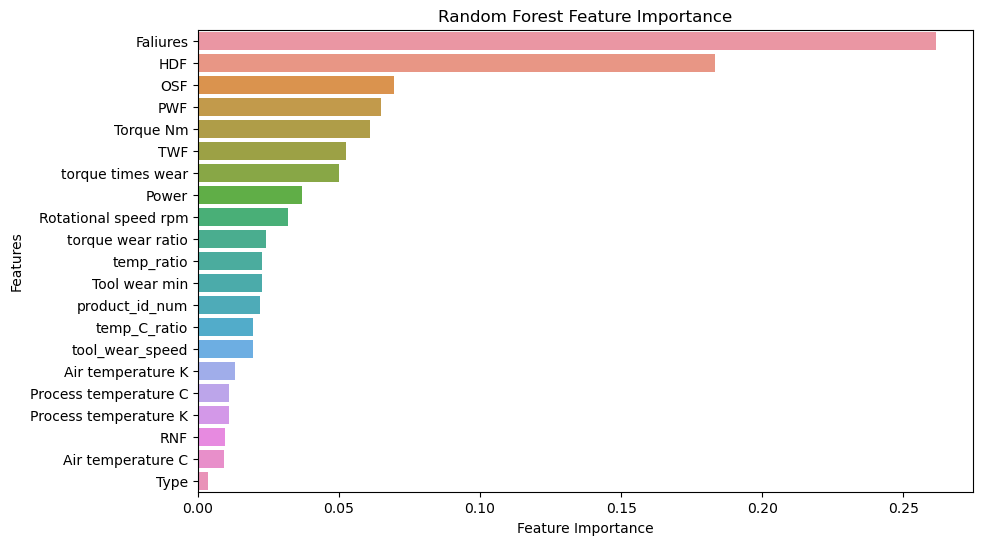

In [42]:
# Feature importance
feature_importance = rf.feature_importances_

# Sort feature importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Sort feature names accordingly
feature_names = X_train.columns[sorted_idx]

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance[sorted_idx], y=feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr = LogisticRegression()
lr.fit(X_train,Y_train)
predict = lr.predict(X_test)


/Users/akshayraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
print(classification_report(Y_test,predict))
print(roc_auc_score(Y_test, [x[1] for x in rf.predict_proba(X_test)]))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     33553
           1       0.92      0.02      0.04       555

    accuracy                           0.98     34108
   macro avg       0.95      0.51      0.52     34108
weighted avg       0.98      0.98      0.98     34108

0.9134260896368606


# GradientBoostingClassifier

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
gbr = GradientBoostingClassifier()
gbr.fit(X_train,Y_train)
predict = gbr.predict(X_test)

In [50]:
print(classification_report(Y_test,predict))
print(roc_auc_score(Y_test, [x[1] for x in rf.predict_proba(X_test)]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     33553
           1       0.98      0.78      0.87       555

    accuracy                           1.00     34108
   macro avg       0.99      0.89      0.93     34108
weighted avg       1.00      1.00      1.00     34108

0.9134260896368606


# Ensembleing Decision Tree and Gradient Boost

In [51]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators=[('gbr', gbr),
                                     ('rf', rf)],
                        voting='soft')

model.fit(X_train, Y_train)

print(roc_auc_score(Y_test, [x[1] for x in model.predict_proba(X_test)]))

0.9643103569101245


# PROSSESSING TEST DATA

In [52]:
test_df = pd.read_csv("test.csv")
test_df[categorical_cols] = encoder.transform(test_df[categorical_cols])
test_df.columns = test_df.columns.str.replace('[\[\]]', '', regex=True)
test_df["Power"] = test_df["Torque Nm"] * test_df["Rotational speed rpm"]
test_df["temp_ratio"] = test_df["Process temperature K"] / test_df["Air temperature K"]
test_df["Process temperature C"] = test_df["Process temperature K"] - 273.15
test_df["Air temperature C"] = test_df["Air temperature K"] - 273.15
test_df["temp_C_ratio"] = test_df["Process temperature C"] / test_df["Air temperature C"]
test_df["Failure Sum"] = (test_df["TWF"] +
                            test_df["HDF"] +
                            test_df["PWF"] +
                            test_df["OSF"] +
                            test_df["RNF"])

test_df["tool_wear_speed"] = test_df["Tool wear min"] * test_df["Rotational speed rpm"]
test_df["torque wear ratio"] = test_df["Torque Nm"] / (test_df["Tool wear min"] + 0.0001)
test_df["torque times wear"] = test_df["Torque Nm"] * test_df["Tool wear min"]
test_df["product_id_num"] = pd.to_numeric(test_df["Product ID"].str.slice(start=1))

ids = test_df["id"]
test_X = test_df.drop(["id", "Product ID"], axis=1)


# Prediction and Submission

In [53]:
ensemble_preds = model.predict_proba(test_X)
predicted_probs_ensemble = np.array([pred[1] for pred in ensemble_preds])

/Users/akshayraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Failure Sum
Feature names seen at fit time, yet now missing:
- Faliures

  warnings.warn(message, FutureWarning)
/Users/akshayraj/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Failure Sum
Feature names seen at fit time, yet now missing:
- Faliures

  warnings.warn(message, FutureWarning)


In [54]:
submission_df = pd.DataFrame({
"id" : ids,
"Machine failure": predicted_probs_ensemble
})
submission_df.shape

(90954, 2)

In [55]:
submission_df.tail(10)

,id,Machine failure
90944,227373,0.699808
90945,227374,0.882155
90946,227375,0.882155
90947,227376,0.898566
90948,227377,0.779100
90949,227378,0.882155
90950,227379,0.879100
90951,227380,0.782155
90952,227381,0.882155
90953,227382,0.882155


In [49]:
submission_df.to_csv("submission.csv", index=False)

# Thank you
